# Coverage analysis

In [1]:
import networkx as nx
import matplotlib
from matplotlib import pyplot
from statistics import median

## Load graph
Parsing GFA file manually, since GfaPy takes a strangely long amount of time reading through it.

In [2]:
# Loads the old graph
#FILENAME = "/home/marcus/PevznerLabBigData/old_graph/sheep_graph_noseq.gfa"

# Loads the new graph
FILENAME = "/home/marcus/PevznerLabBigData/20201014_graph/noseq.gfa"

# We ignore directionality for right now
graph = nx.Graph()

with open(FILENAME, "r") as gfafile:
    for line in gfafile:
        if line[0] == "S":
            parts = line.strip().split("\t")
            node_name = parts[1]
            node_len = None
            node_cov = None
            extra_data = parts[3:]
            for tag in extra_data:
                if tag.startswith("LN:i:"):
                    if node_len is None:
                        node_len = int(tag[5:])
                    else:
                        raise ValueError("Duplicate length for node {}".format(node_name))
                elif tag.startswith("dp:i:"):
                    if node_cov is None:
                        node_cov = int(tag[5:])
                    else:
                        raise ValueError("Duplicate coverage for node {}".format(node_name))
            graph.add_node(node_name, length=node_len, cov=node_cov)
        elif line[0] == "L":
            parts = line.strip().split("\t")
            src = parts[1]
            snk = parts[3]
            # Ignore directionality for just right now; this means that some links will be "repeated" (for
            # the new graph this means that the NX representation has 484 less links)
            graph.add_edge(src, snk)

print("Graph contains {} edges (represented as GFA segments).".format(graph.number_of_nodes()))
print("Graph contains {} links between edges (ignoring directionality for now).".format(graph.number_of_edges()))
print("Graph contains {} connected components.".format(nx.number_connected_components(graph)))

Graph contains 36260 edges (represented as GFA segments).
Graph contains 40545 links between edges (ignoring directionality for now).
Graph contains 8655 connected components.


## Compute coverage statstics for each component

In [3]:
# Sort components by number of edges.
node2len = nx.get_node_attributes(graph, "length")
node2cov = nx.get_node_attributes(graph, "cov")
sorted_components = sorted(
    nx.connected_components(graph),
    key=len,
    reverse=True
)

node2cmp = {}
cmp2totalLen = {}
cmp2meanCov = {}
cmp2medianCov = {}
cmp2cov = {}
for i, cmp in enumerate(sorted_components):
    for node in cmp:
        node2cmp[node] = i + 1
    cmp2cov[i] = [node2cov[node] for node in cmp]
    cmp2totalLen[i] = sum([node2len[node] for node in cmp])
    cmp2meanCov[i] = sum(cmp2cov[i]) / len(cmp)
    cmp2medianCov[i] = median(cmp2cov[i])
    # https://stackoverflow.com/a/10742904/10730311
    cmpNum = "{:,}".format(i + 1).ljust(6, " ")
    print("Component #{}: {} edges, total length {:,}, mean coverage {:.2f}x, median coverage {:.2f}x, has edge {}".format(
        # https://stackoverflow.com/a/59841/10730311
        cmpNum, len(cmp), cmp2totalLen[i], cmp2meanCov[i], cmp2medianCov[i], next(iter(cmp))
    ))

Component #1     : 21062 edges, total length 671,531,395, mean coverage 197.31x, median coverage 19.00x, has edge 17089
Component #2     : 823 edges, total length 7,117,879, mean coverage 23.15x, median coverage 19.00x, has edge 3591
Component #3     : 422 edges, total length 6,960,522, mean coverage 12.80x, median coverage 11.00x, has edge 29844
Component #4     : 383 edges, total length 5,802,376, mean coverage 46.33x, median coverage 40.00x, has edge 10241
Component #5     : 304 edges, total length 2,657,523, mean coverage 300.43x, median coverage 272.50x, has edge 14479
Component #6     : 295 edges, total length 2,434,666, mean coverage 17.67x, median coverage 17.00x, has edge 22219
Component #7     : 205 edges, total length 1,761,875, mean coverage 35.33x, median coverage 32.00x, has edge 32386
Component #8     : 152 edges, total length 14,109,441, mean coverage 24.25x, median coverage 16.00x, has edge 13142
Component #9     : 143 edges, total length 3,705,162, mean coverage 8.86x

Component #2,922 : 1 edges, total length 72,179, mean coverage 3.00x, median coverage 3.00x, has edge 13295
Component #2,923 : 1 edges, total length 19,332, mean coverage 5.00x, median coverage 5.00x, has edge 13306
Component #2,924 : 1 edges, total length 3,556, mean coverage 4.00x, median coverage 4.00x, has edge 13308
Component #2,925 : 1 edges, total length 1,848, mean coverage 4.00x, median coverage 4.00x, has edge 13318
Component #2,926 : 1 edges, total length 7,688, mean coverage 4.00x, median coverage 4.00x, has edge 13352
Component #2,927 : 1 edges, total length 121,769, mean coverage 3.00x, median coverage 3.00x, has edge 13356
Component #2,928 : 1 edges, total length 55,939, mean coverage 4.00x, median coverage 4.00x, has edge 13357
Component #2,929 : 1 edges, total length 20,330, mean coverage 5.00x, median coverage 5.00x, has edge 13365
Component #2,930 : 1 edges, total length 2,769, mean coverage 50.00x, median coverage 50.00x, has edge 13367
Component #2,931 : 1 edges, t

Component #5,303 : 1 edges, total length 2,804, mean coverage 13.00x, median coverage 13.00x, has edge 23426
Component #5,304 : 1 edges, total length 3,114, mean coverage 12.00x, median coverage 12.00x, has edge 23427
Component #5,305 : 1 edges, total length 1,030, mean coverage 10.00x, median coverage 10.00x, has edge 23431
Component #5,306 : 1 edges, total length 43,996, mean coverage 9.00x, median coverage 9.00x, has edge 23432
Component #5,307 : 1 edges, total length 32,434, mean coverage 10.00x, median coverage 10.00x, has edge 23433
Component #5,308 : 1 edges, total length 35,364, mean coverage 11.00x, median coverage 11.00x, has edge 23434
Component #5,309 : 1 edges, total length 2,599, mean coverage 8.00x, median coverage 8.00x, has edge 23443
Component #5,310 : 1 edges, total length 3,208, mean coverage 9.00x, median coverage 9.00x, has edge 23444
Component #5,311 : 1 edges, total length 28,529, mean coverage 9.00x, median coverage 9.00x, has edge 23445
Component #5,312 : 1 ed

Component #7,899 : 1 edges, total length 18,943, mean coverage 3.00x, median coverage 3.00x, has edge 31138
Component #7,900 : 1 edges, total length 120,901, mean coverage 4.00x, median coverage 4.00x, has edge 31139
Component #7,901 : 1 edges, total length 21,976, mean coverage 4.00x, median coverage 4.00x, has edge 31140
Component #7,902 : 1 edges, total length 55,971, mean coverage 3.00x, median coverage 3.00x, has edge 31141
Component #7,903 : 1 edges, total length 68,523, mean coverage 4.00x, median coverage 4.00x, has edge 31142
Component #7,904 : 1 edges, total length 61,449, mean coverage 3.00x, median coverage 3.00x, has edge 31143
Component #7,905 : 1 edges, total length 66,122, mean coverage 5.00x, median coverage 5.00x, has edge 31144
Component #7,906 : 1 edges, total length 115,785, mean coverage 3.00x, median coverage 3.00x, has edge 31147
Component #7,907 : 1 edges, total length 58,362, mean coverage 3.00x, median coverage 3.00x, has edge 31148
Component #7,908 : 1 edges

## Compute entire-graph coverage statistics

In [4]:
covs = node2cov.values()
print("Minimum coverage: {}".format(min(covs)))
print("Maximum coverage: {}\n".format(max(covs)))
print("Average coverage: {:.2f}".format(sum(covs) / len(covs)))
print("Median coverage: {}\n".format(median(covs)))

print("===MAX COVERAGE EDGES===")
max_cov_nodes = sorted(node2cov.keys(), key=lambda node: node2cov[node], reverse=True)
for i in range(10):
    node = max_cov_nodes[i]
    print(
        "{}. Edge {} has a coverage of {}. {} neighbors.".format(
            i + 1, node, node2cov[node], len(graph.adj[node])
        )
    )
    
# (Allowing self edges, tho)
print("\n===MAX COVERAGE EDGES (just isolated ones)===")
max_cov_isolated_nodes = list(
    filter(
        lambda node: len(set(graph.adj[node]) - set([node])) == 0,
        max_cov_nodes
    )
)
for i in range(10):
    node = max_cov_isolated_nodes[i]
    print("{}. Edge {} has a coverage of {}.".format(i + 1, node, node2cov[node]))

Minimum coverage: 0
Maximum coverage: 220608

Average coverage: 139.06
Median coverage: 12.0

===MAX COVERAGE EDGES===
1. Edge 3782 has a coverage of 220608. 5 neighbors.
2. Edge 3788 has a coverage of 200830. 7 neighbors.
3. Edge 1016 has a coverage of 184382. 3 neighbors.
4. Edge 3784 has a coverage of 174847. 4 neighbors.
5. Edge 1012 has a coverage of 139715. 7 neighbors.
6. Edge 3791 has a coverage of 105920. 4 neighbors.
7. Edge 1019 has a coverage of 81073. 3 neighbors.
8. Edge 2 has a coverage of 70236. 5 neighbors.
9. Edge 999 has a coverage of 69045. 7 neighbors.
10. Edge 1014 has a coverage of 51202. 4 neighbors.

===MAX COVERAGE EDGES (just isolated ones)===
1. Edge 1010 has a coverage of 25421.
2. Edge 3172 has a coverage of 17083.
3. Edge 12782 has a coverage of 9204.
4. Edge 836 has a coverage of 8864.
5. Edge 842 has a coverage of 8831.
6. Edge 31439 has a coverage of 8761.
7. Edge 3175 has a coverage of 8660.
8. Edge 831 has a coverage of 8646.
9. Edge 833 has a covera

## Find long (>= 1 million bp) and high-coverage (> 500x) edges in simple areas of the graph

(Good candidates for constructing mutation spectra.)

In [5]:
good_nodes = filter(lambda node: node2len[node] > 1000000, max_cov_nodes)
for i, node in enumerate(good_nodes):
    if node2cov[node] >= 100:
        cmp = node2cmp[node]
        neighbors = set(graph.adj[node]) - set([node])
        print(
            "{}. Edge {} has a coverage of {:,} and length of {:,}. {} neighbors, ignoring self-edges. In component {}.".format(
                i + 1, node, node2cov[node], node2len[node], len(neighbors), cmp
            )
        )
    else:
        break

1. Edge 1483 has a coverage of 1,221 and length of 1,013,247. 3 neighbors, ignoring self-edges. In component 1.
2. Edge 7998 has a coverage of 853 and length of 1,634,900. 0 neighbors, ignoring self-edges. In component 1822.
3. Edge 166 has a coverage of 557 and length of 1,302,342. 0 neighbors, ignoring self-edges. In component 512.
4. Edge 6018 has a coverage of 538 and length of 2,232,606. 3 neighbors, ignoring self-edges. In component 150.
5. Edge 4706 has a coverage of 434 and length of 1,020,246. 4 neighbors, ignoring self-edges. In component 1.
6. Edge 3233 has a coverage of 430 and length of 1,036,175. 3 neighbors, ignoring self-edges. In component 1.
7. Edge 2069 has a coverage of 248 and length of 2,778,833. 0 neighbors, ignoring self-edges. In component 843.
8. Edge 1866 has a coverage of 245 and length of 1,523,208. 3 neighbors, ignoring self-edges. In component 1.
9. Edge 25824 has a coverage of 196 and length of 1,197,225. 3 neighbors, ignoring self-edges. In component 1.

## Visualize histogram of average coverage by component

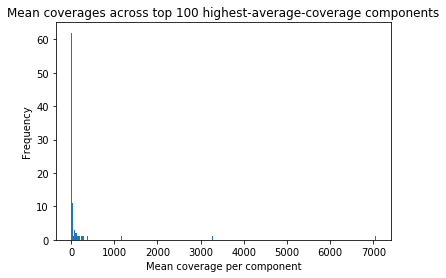

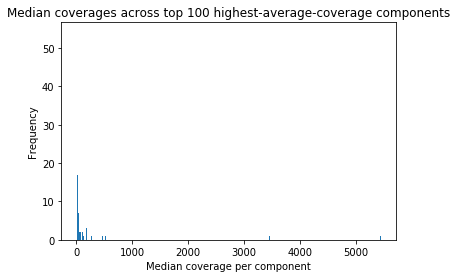

In [6]:
%matplotlib inline

pyplot.hist(x=[cmp2meanCov[c] for c in range(100)], bins="auto")
pyplot.xlabel("Mean coverage per component")
pyplot.ylabel("Frequency")
pyplot.title("Mean coverages across top 100 highest-average-coverage components")
pyplot.show()

pyplot.hist(x=[cmp2medianCov[c] for c in range(100)], bins="auto")
pyplot.xlabel("Median coverage per component")
pyplot.ylabel("Frequency")
pyplot.title("Median coverages across top 100 highest-average-coverage components")
pyplot.show()

## Visualize coverage histograms for the top $N$ components by mean coverage
Adapted from [this article](https://realpython.com/python-histograms/#visualizing-histograms-with-matplotlib-and-pandas).

In [ ]:
%matplotlib inline
import math

N = 72

for i in range(N):
    noun = "edge" if len(cmp2cov[i]) == 1 else "edges"
    title = "Coverages: Component #{}\n{:,} {}; total length {:,}; mean coverage {:.2f}x".format(
        i + 1, len(cmp2cov[i]), noun, cmp2totalLen[i], cmp2meanCov[i]
    )
    pyplot.hist(x=cmp2cov[i], bins="auto")
        
    pyplot.xlabel("Coverage")
    pyplot.ylabel("Frequency")
    pyplot.title(title)
    pyplot.show()

## How many of the top $N$ components contain just 1 edge?

In [7]:
num_1_edge_cmps = 0
for i in range(N):
    if len(cmp2cov[i]) == 1:
        num_1_edge_cmps += 1
print("{} of the top {} components have just 1 edge.".format(num_1_edge_cmps, N))

NameError: name 'N' is not defined

## For all components, plot number of edges vs. mean coverage

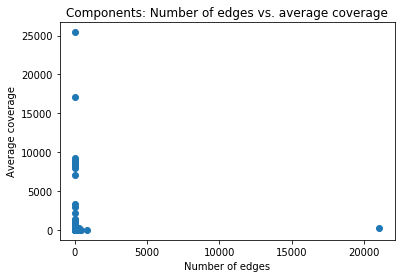

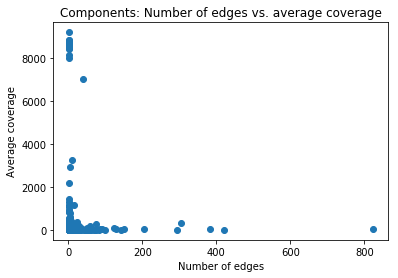

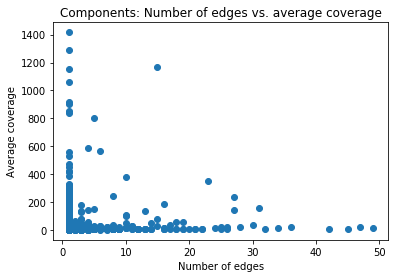

In [8]:
for cutoffs in [ [float("inf"), float("inf")], [1000, 10000], [50, 2000] ]:
    num_edges = []
    mean_cov = []
    for i, cmp in enumerate(sorted_components):
        ne = len(cmp)
        mc = cmp2meanCov[i]
        if ne < cutoffs[0] and mc < cutoffs[1]:
            num_edges.append(ne)
            mean_cov.append(mc)

    pyplot.scatter(x=num_edges, y=mean_cov)
    pyplot.title("Components: Number of edges vs. average coverage")
    pyplot.xlabel("Number of edges")
    pyplot.ylabel("Average coverage")
    pyplot.show()

## Visualize pileups

### 1. Visualizing "disagreement frequency"

For each edge sequence, find the number of matches (`.` or `,` characters) and return

\begin{equation}
\frac{1 - \text{Number of matching reads}}{\text{Number of aligned reads}}
\end{equation}

There may be some noise here due to the reuse of ASCII characters for base qualities—for a publication this should be redone with a dedicated pileup format parser.

In [ ]:
# for e in ("1010", "3172", "12782", "836", "842", "31439", "3175", "831", "833", "12783"):
#     with open("/home/marcus/PevznerLabBigData/20201014_graph/selected_pileup.txt", "r") as pf:
#         mutations_for_edge = []
#         pos = []
#         edge_header = "edge_{}_".format(e)
#         for line in pf:
#             if line.startswith(edge_header):
#                 split = line.split("\t")
#                 num_matches = split[4].count(".") + split[4].count(",")
#                 mutations_for_edge.append(1 - (num_matches / int(split[3])))
#                 pos.append(int(split[1]))

#     pyplot.scatter(x=pos, y=mutations_for_edge)
#     pyplot.title("Edge {}: Disagreement 'frequency'".format(e))
#     pyplot.xlabel("Sequence position")
#     pyplot.ylabel("Mutation frequency")
#     pyplot.ylim(bottom=0)
#     pyplot.show()

### 2. Visualizing raw number of discordant aligned reads

For each edge sequence, find the number of matches (`.` or `,` characters) and return

\begin{equation}
\text{Number of aligned reads} - \text{Number of matching reads}
\end{equation}

Same noise thing with ASCII characters applies.

In [9]:
from collections import defaultdict
edge2mutations = defaultdict(list)
edge2pos = defaultdict(list)
with open("/home/marcus/PevznerLabBigData/20201014_graph/selected_pileup.txt", "r") as pf:
    for line in pf:
        split = line.split("\t")
        lineheader = split[0]
        edgenum = lineheader.split("_")[1]
        num_matches = split[4].count(".") + split[4].count(",")
        edge2mutations[edgenum].append(int(split[3]) - num_matches)
        edge2pos[edgenum].append(int(split[1]))
        
# Following this, on the cluster I converted edge2mutations and edge2pos to json files using
# the https://stackoverflow.com/a/7100202/10730311 approach.

In [ ]:
# import json
# with open("/home/marcus/PevznerLabBigData/20201014_graph/e2m.json", "r") as mf:
#     edge2mutations = json.load(mf)
# with open("/home/marcus/PevznerLabBigData/20201014_graph/e2p.json", "r") as pf:
#     edge2pos = json.load(pf)

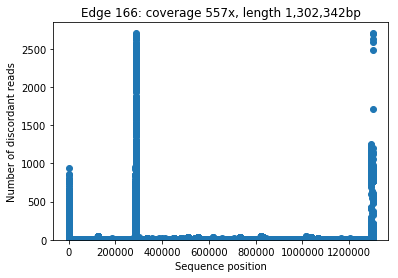

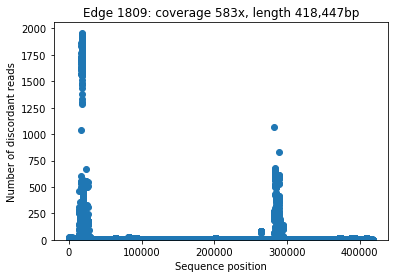

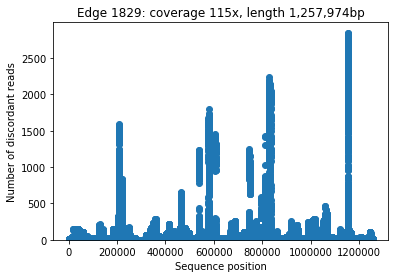

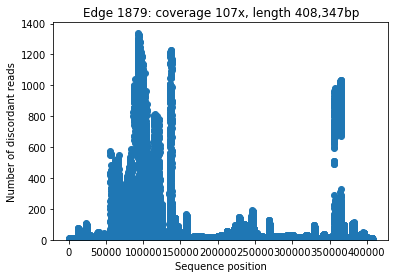

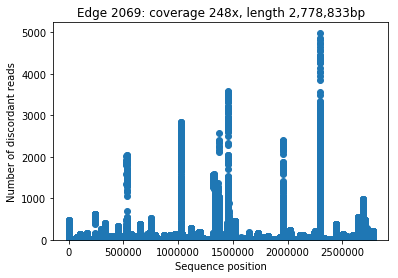

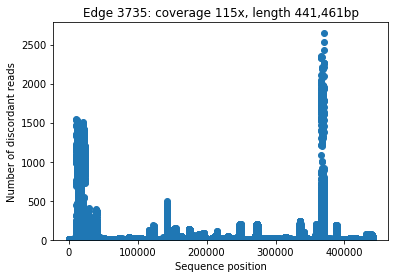

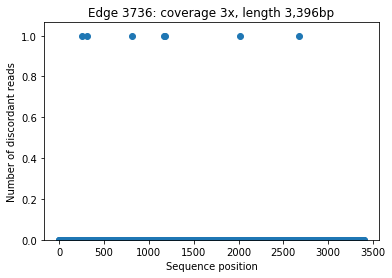

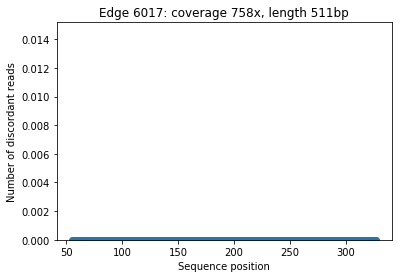

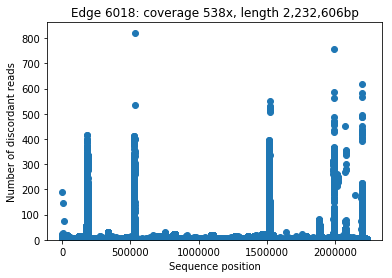

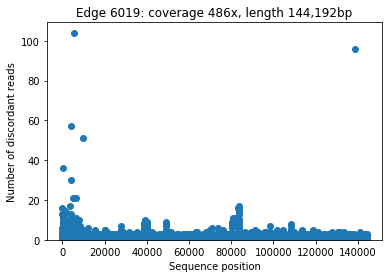

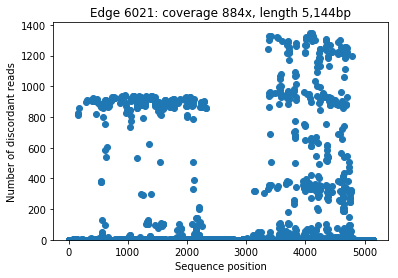

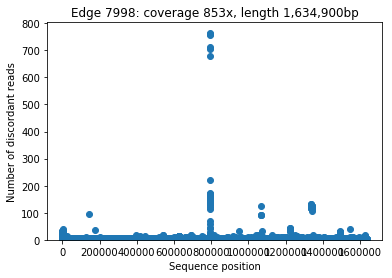

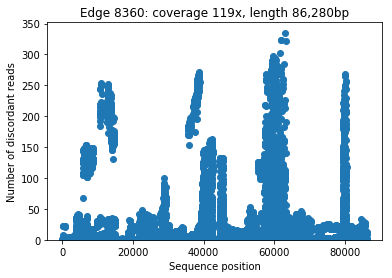

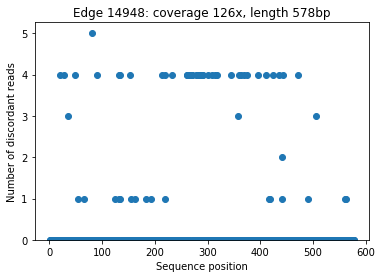

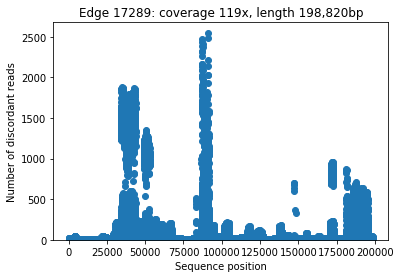

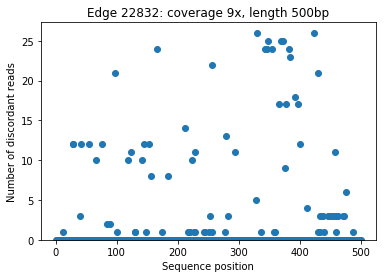

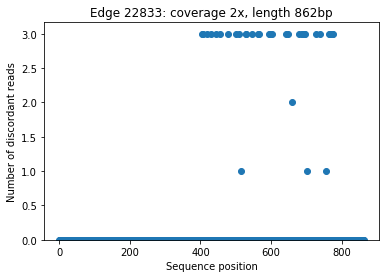

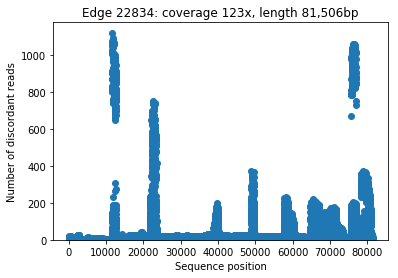

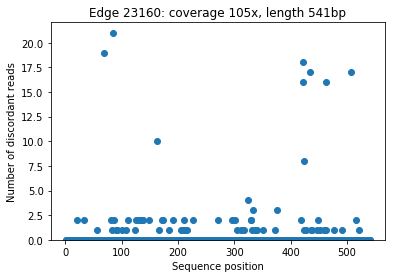

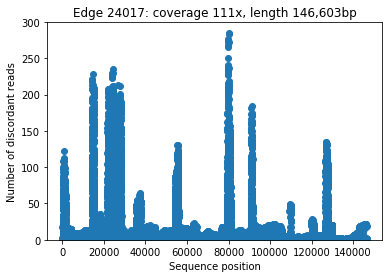

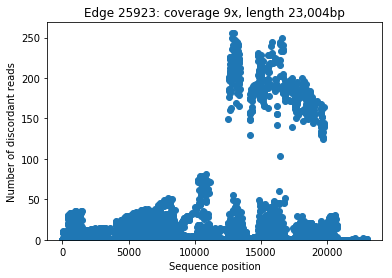

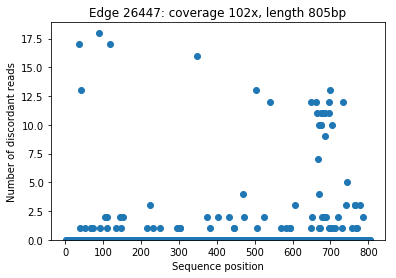

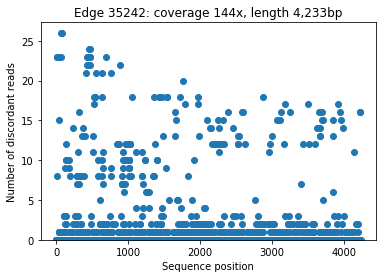

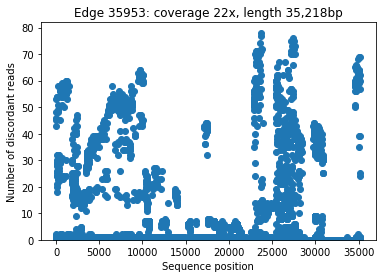

In [15]:
for e in edge2mutations.keys():
    pyplot.scatter(x=edge2pos[e], y=edge2mutations[e])
    pyplot.title("Edge {}: coverage {:,}x, length {:,}bp".format(e, node2cov[e], node2len[e]))
    pyplot.xlabel("Sequence position")
    pyplot.ylabel("Number of discordant reads")
    pyplot.ylim(bottom=0)
    pyplot.show()

## Go through predicted genes and compute mutation frequencies at 1st, 2nd, 3rd positions

In [24]:
# Looks like {7998: {1: 1, 2: 0.75, 3: 0.5, 4: 1, ...}}
edge2pos2mutfreq = defaultdict(dict)
with open("/home/marcus/PevznerLabBigData/20201014_graph/selected_pileup.txt", "r") as pf:
    for line in pf:
        split = line.split("\t")
        lineheader = split[0]
        edgenum = lineheader.split("_")[1]
        num_matches = split[4].count(".") + split[4].count(",")
        
        # use 1-indexed coordinates, since MetaGeneMark does in its output (as far as I can tell).
        pos = int(split[1]) + 1
        mutation_freq = 1 - (num_matches / int(split[3]))
        edge2pos2mutfreq[edgenum][pos] = mutation_freq

import pandas as pd
for edge in ["7998", "166", "6018"]:
    mgm = pd.read_csv(
        "/home/marcus/PevznerLabBigData/20201014_graph/{}_mgm_genes.txt".format(edge),
        sep="\s+", skiprows=[1], index_col=0
    )
    for gene in mgm.itertuples():
        # Total mutation rates for each of the 0th, 1st, 2nd positions in the gene regions
        # (repeating, so it goes 0, 1, 2, 0, 1, 2, ...)
        mut_rates = [0, 0, 0]
        
        try:
            start = int(gene.LeftEnd)
        except ValueError:
            # Account for the "<2" left end coordinate in one of the genes predicted
            start = int(gene.LeftEnd[1:])
        end = int(gene.RightEnd)
        
        i = 0
        for pos in range(start, end + 1):
            mut_rates[i] += edge2pos2mutfreq[edge][pos]
            if i == 0:
                i = 1
            elif i == 1:
                i = 2
            elif i == 2:
                i = 0
            else:
                raise ValueError("Marcus forgot how modulos work, go yell at him pls")
                
        if i != 0:
            raise ValueError("Gene length not divisible by 3.")
            
        # We just added up the mutation rates at each position, so what we gotta do now is average them.
        # Since we ended on a 2 (since i is now 0), we can assume that the number of 0s, 1s, and 2s is equal.
        one_third_of_num_posns = (end - start + 1) / 3
        
        mut_rates[0] /= one_third_of_num_posns
        mut_rates[1] /= one_third_of_num_posns
        mut_rates[2] /= one_third_of_num_posns
        print("Edge {}, gene {}: {} | {} | {}".format(edge, gene.Index, *mut_rates))
        # TODO: bar plot of 0, 1, 2?

FileNotFoundError: [Errno 2] No such file or directory: '/home/marcus/PevznerLabBigData/20201014_graph/selected_pileup.txt'